In [111]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

from sklearn import linear_model

In [10]:
cd chap3

[Errno 2] No such file or directory: 'chap3'
/Users/takashi/takashi/sandbox/python/book1/chap3


In [14]:
import requests,zipfile
from io import StringIO
import io

In [18]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [20]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [26]:
student_data_math = pd.read_csv('student-mat.csv')
student_data_math

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
390,"MS;""M"";20;""U"";""LE3"";""A"";2;2;""services"";""servic..."
391,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."
392,"MS;""M"";21;""R"";""GT3"";""T"";1;1;""other"";""other"";""c..."
393,"MS;""M"";18;""R"";""LE3"";""T"";3;2;""services"";""other""..."


In [28]:
student_data_math = pd.read_csv('student-mat.csv',sep=';')
student_data_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [30]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [39]:
#質的データ（数値化されていないので比較できない）
student_data_math['sex'].head()


0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [40]:
#量的データ（数値化されているので比較できる）
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [51]:
#アメリカの飲酒って15歳からOKだっけ？（21歳からです）
student_data_math.groupby('age')['Walc'].mean()

age
15    1.902439
16    2.278846
17    2.571429
18    2.414634
19    1.958333
20    2.333333
21    3.000000
22    5.000000
Name: Walc, dtype: float64

平均値：5.708860759493671
中央地：4.0
最頻値：0    0
dtype: int64
分散値：64.04954057700957
分散値：8.00309568710818


count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

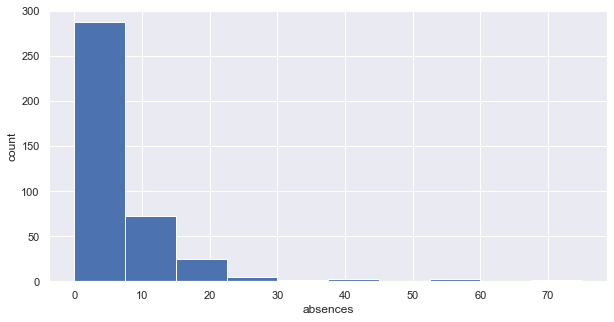

In [69]:
plt.figure (figsize=(10,5))
plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)
#右に歪みがあるデータの図

#平均
print (f"平均値：{student_data_math['absences'].mean()}")
#中央値
print (f"中央地：{student_data_math['absences'].median()}")
#最頻値
print (f"最頻値：{student_data_math['absences'].mode()}")
#分散値
print (f"分散値：{student_data_math['absences'].var()}")
#標準偏差
print (f"分散値：{student_data_math['absences'].std()}")
student_data_math['absences'].describe()


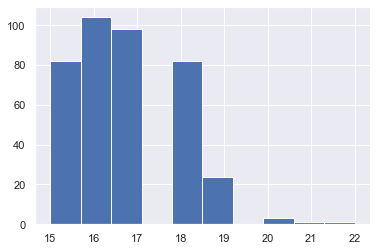

In [86]:
student_data_math['age'].describe()
plt.hist(student_data_math['age'])
plt.grid('True')

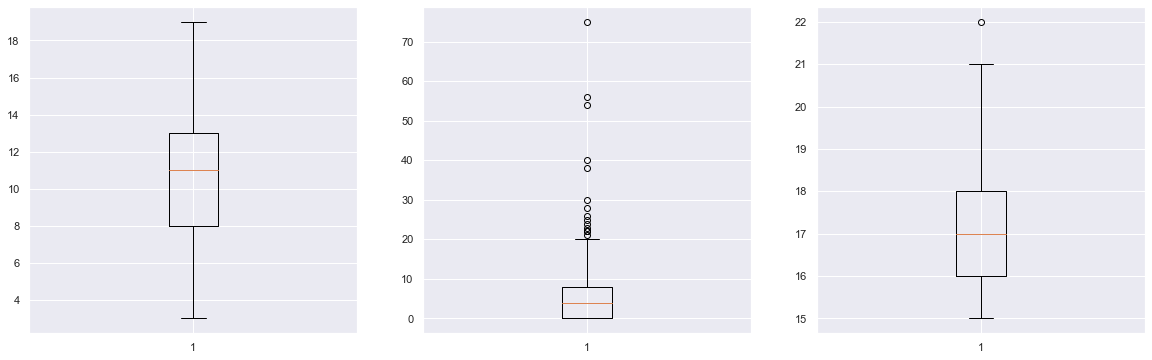

In [88]:

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.boxplot(student_data_math['G1'])
plt.grid(True)

plt.subplot(1,3,2)
plt.boxplot(student_data_math['absences'])
plt.grid(True)

plt.subplot(1,3,3)
plt.boxplot(student_data_math['age'])
plt.grid(True)

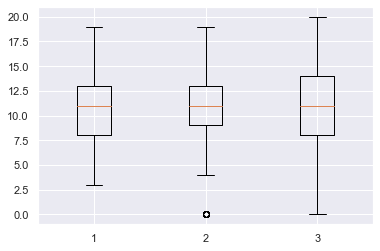

In [91]:
plt.boxplot([student_data_math['G1'],student_data_math['G2'],student_data_math['G3']])
plt.grid(True)

In [98]:
#cv(変動係数)平均値の異なる指標のばらつき具合を比較するために使う
cv = student_data_math['absences'].std()/student_data_math['absences'].mean()
print (cv)

cv = student_data_math['G1'].std()/student_data_math['G1'].mean()
print (cv)

#各項目のCV（変動係数）を一括で計算できる
student_data_math.std()/student_data_math.mean()

1.4018726369879073
0.304265930667331


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

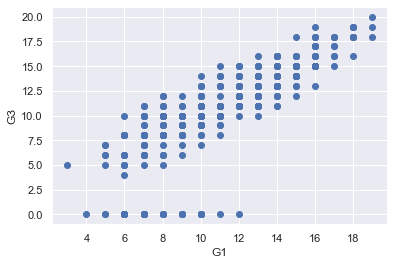

In [105]:
plt.plot(student_data_math['G1'],student_data_math['G3'],'o')
plt.xlabel('G1')
plt.ylabel('G3')
plt.grid(True)

In [113]:
#共分散
print (np.cov(student_data_math['G1'],student_data_math['G3']))
print (student_data_math['G1'].var())
print (student_data_math['G3'].var())
    

[[11.017 12.188]
 [12.188 20.99 ]]
11.017053267364904
20.989616397866733


(0.8014679320174141, 9.001430312277354e-90)

In [115]:
sp.stats.pearsonr(student_data_math['G1'],student_data_math['G3'])

(0.8014679320174141, 9.001430312277354e-90)

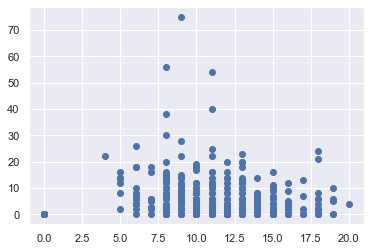

In [120]:
sp.stats.pearsonr(student_data_math['G3'],student_data_math['absences'])
plt.plot(student_data_math['G3'],student_data_math['absences'],'o')

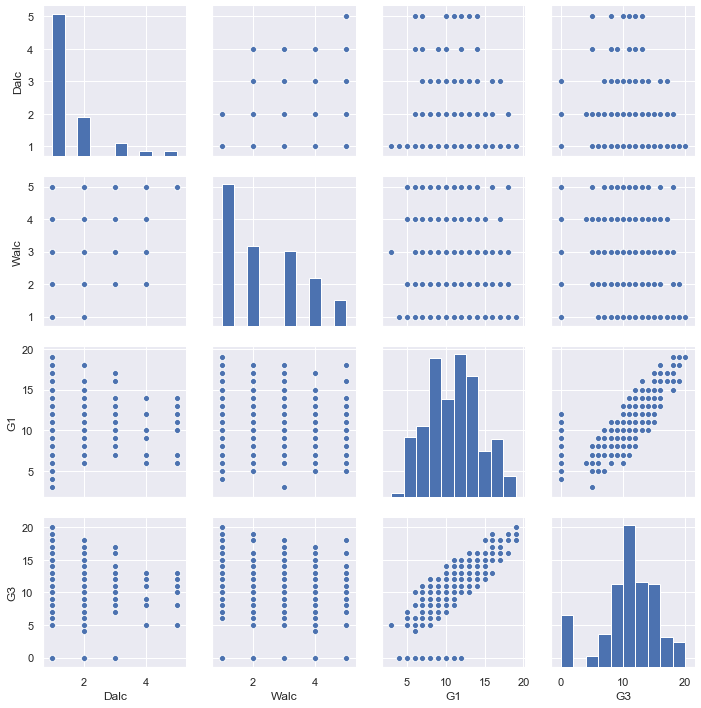

In [123]:
sns.pairplot(student_data_math[['Dalc','Walc','G1','G3']])
plt.grid(True)

In [126]:
pwd

'/Users/takashi/takashi/sandbox/python/book1/chap3'

In [128]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [137]:
studen_data_por = pd.read_csv('student-por.csv',sep=';')
studen_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [158]:
student_data_total = student_data_math.merge(studen_data_por,on=['school','sex','age','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],suffixes=['_math','_por'])

In [166]:
student_data_total.isna().sum()

school             0
sex                0
age                0
address_math       0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0
reason             0
guardian_math      0
traveltime_math    0
studytime_math     0
failures_math      0
schoolsup_math     0
famsup_math        0
paid_math          0
activities_math    0
nursery            0
higher_math        0
internet           0
romantic_math      0
famrel_math        0
freetime_math      0
goout_math         0
Dalc_math          0
Walc_math          0
health_math        0
absences_math      0
G1_math            0
G2_math            0
G3_math            0
address_por        0
guardian_por       0
traveltime_por     0
studytime_por      0
failures_por       0
schoolsup_por      0
famsup_por         0
paid_por           0
activities_por     0
higher_por         0
romantic_por       0
famrel_por         0
freetime_por       0
goout_por          0
Dalc_por     

(array([  1.,   0.,   1.,  10.,  44., 105., 113.,  80.,  31.,   6.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

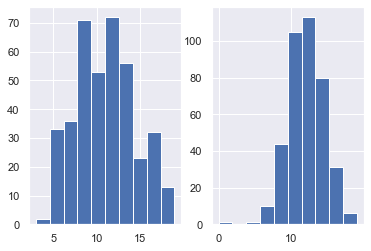

In [164]:
student_data_total['G1_math'],student_data_total['G1_por']
plt.subplot(1,2,1)
plt.hist(student_data_total['G1_math'])
plt.subplot(1,2,2)
plt.hist(student_data_total['G1_por'])

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

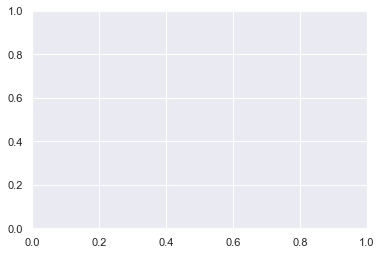

In [157]:
plt.scatter(student_data_total['G1_math'],student_data_total['G1_por'],'o')

In [167]:
student_data_total

,school,sex,age,address_math,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
387,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
388,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
389,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


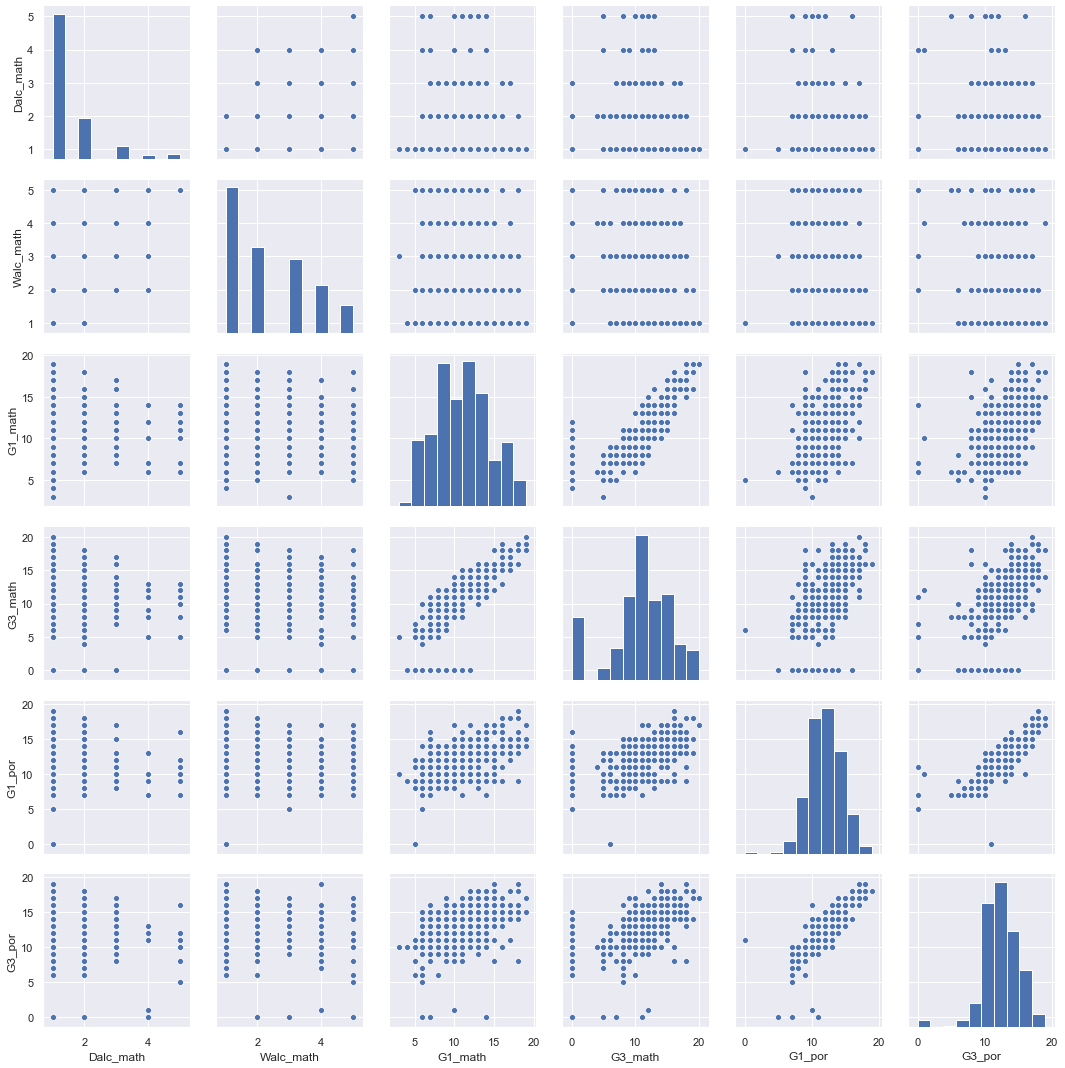

In [171]:
sns.pairplot(student_data_total[['Dalc_math','Walc_math','G1_math','G3_math','G1_por','G3_por']])
plt.grid(True)

In [194]:

student_data_total[student_data_total['school'] == 'MS'].groupby('sex').mean()[['G1_por','G3_por','G1_math','G3_math']]

,G1_por,G3_por,G1_math,G3_math
sex,,,,
F,11.521739,11.782609,10.608696,9.173913
M,10.000000,9.823529,10.470588,9.882353


In [198]:
student_data_total.groupby(['school','sex']).mean()[['G1_por','G3_por','G1_math','G3_math']]

G1_por     G3_por    G1_math    G3_math
school sex                                            
GP     F    12.636872  13.217877  10.413408   9.765363
       M    11.854651  12.151163  11.482558  11.168605
MS     F    11.521739  11.782609  10.608696   9.173913
       M    10.000000   9.823529  10.470588   9.882353

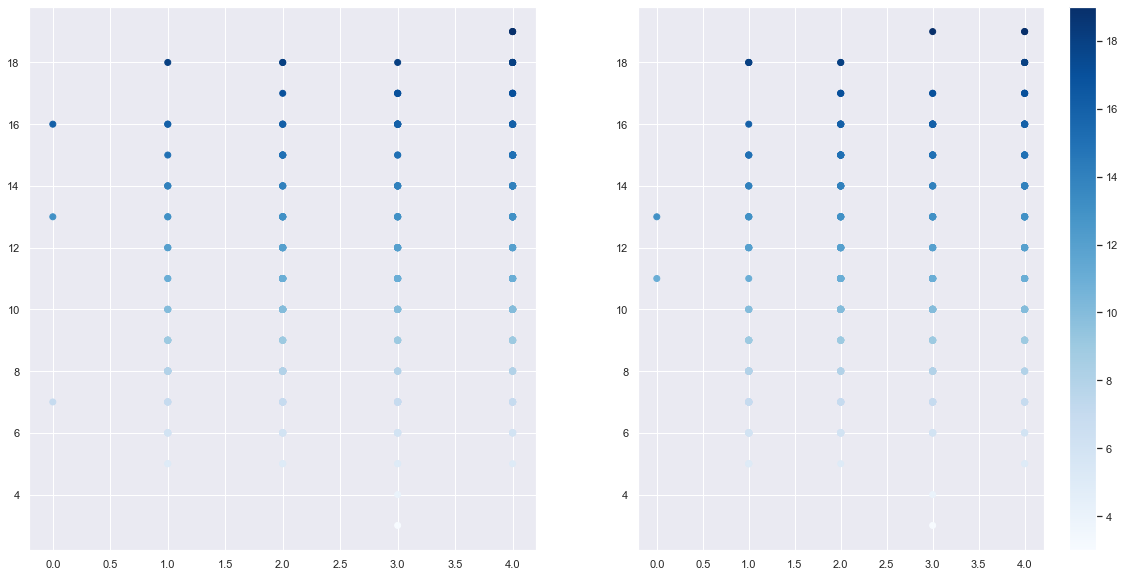

In [218]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(student_data_total.Medu,student_data_total.G1_math,c=student_data_total.G1_math,cmap='Blues')
plt.subplot(1,2,2)
plt.scatter(student_data_total.Fedu,student_data_total.G1_math,c=student_data_total.G1_math,cmap='Blues')
plt.colorbar()
plt.grid(True)

(array([2., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([11.333, 11.48 , 11.626, 11.773, 11.919, 12.066, 12.212, 12.359,
        12.506, 12.652, 12.799]),
 <a list of 10 Patch objects>)

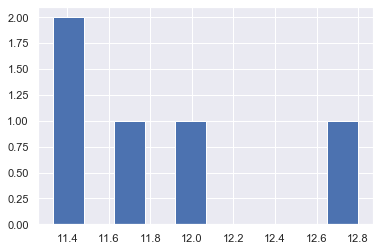

In [238]:
student_data_total.groupby('Medu')['G1_math'].mean()

plt.hist(student_data_total.groupby('Medu')['G1_por'].mean())
#plt.grid('True')
